In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('cleaner.csv')

In [4]:
df.head()

,Unnamed: 0,Consumer_complaint_narrative,Product
0,0,natual person living human right usc equifa go...,"Credit reporting, credit repair services, or o..."
1,1,submitting complaint delete following fraudule...,"Credit reporting, credit repair services, or o..."
2,2,last year attempted numerous occasion informat...,"Credit reporting, credit repair services, or o..."
3,3,recently made aware violating consumer rep...,"Credit reporting, credit repair services, or o..."
4,4,credit going,"Credit reporting, credit repair services, or o..."


In [5]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [6]:
MAX_SEQUENCE_LENGTH=400
EMBEDDING_DIM=100

In [7]:
token=Tokenizer()

In [8]:
df['Consumer_complaint_narrative']=df['Consumer_complaint_narrative'].astype('str')

In [9]:
token.fit_on_texts(df['Consumer_complaint_narrative'].values)

In [10]:
word_index=token.word_index

In [11]:
len(token.word_index)+1

20760

In [12]:
print(word_index)

{'account': 1, 'payment': 2, 'loan': 3, 'credit': 4, 'would': 5, 'bank': 6, 'time': 7, 'told': 8, 'day': 9, 'received': 10, 'information': 11, 'money': 12, 'call': 13, 'company': 14, 'called': 15, 'report': 16, 'back': 17, 'amount': 18, 'get': 19, 'month': 20, 'pay': 21, 'one': 22, 'email': 23, 'sent': 24, 'never': 25, 'number': 26, 'also': 27, 'made': 28, 'said': 29, 'due': 30, 'card': 31, 'interest': 32, 'service': 33, 'paid': 34, 'debt': 35, 'could': 36, 'consumer': 37, 'phone': 38, 'letter': 39, 'year': 40, 'check': 41, 'still': 42, 'make': 43, 'since': 44, 'balance': 45, 'u': 46, 'fee': 47, 'asked': 48, 'charge': 49, 'customer': 50, 'well': 51, 'transaction': 52, 'late': 53, 'help': 54, 'even': 55, 'date': 56, 'issue': 57, 'request': 58, 'need': 59, 'fund': 60, 'reporting': 61, 'complaint': 62, 'car': 63, 'financial': 64, 'contacted': 65, 'state': 66, 'name': 67, 'statement': 68, 'take': 69, 'know': 70, 'please': 71, 'see': 72, 'new': 73, 'right': 74, 'first': 75, 'business': 76, 

In [13]:
print('Found %s unique tokens.' % len(word_index))

Found 20759 unique tokens.


In [14]:
X=token.texts_to_sequences(df['Consumer_complaint_narrative'].values)

In [15]:
X=pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)

In [16]:
print('Shape of data tensor',X.shape)

Shape of data tensor (14000, 400)


In [17]:
Y=pd.get_dummies(df['Product']).values

In [18]:
print('Shape of label tensor',Y.shape)

Shape of label tensor (14000, 9)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=68)

In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(11200, 400) (11200, 9)
(2800, 400) (2800, 9)


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D,Dropout
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [23]:
model=Sequential()
model.add(Embedding(92507,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 100)          9250700   
                                                                 
 spatial_dropout1d (SpatialD  (None, 400, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 9,369,109
Trainable params: 9,369,109
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
epochs=9
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/9
158/158 [==============================] - 307s 2s/step - loss: 1.7752 - accuracy: 0.3343 - val_loss: 1.5733 - val_accuracy: 0.4089
Epoch 2/9
158/158 [==============================] - 283s 2s/step - loss: 1.2188 - accuracy: 0.5322 - val_loss: 1.2351 - val_accuracy: 0.5027
Epoch 3/9
158/158 [==============================] - 287s 2s/step - loss: 0.9512 - accuracy: 0.6609 - val_loss: 0.9824 - val_accuracy: 0.6580
Epoch 4/9
158/158 [==============================] - 308s 2s/step - loss: 0.7853 - accuracy: 0.7394 - val_loss: 0.8752 - val_accuracy: 0.7063
Epoch 5/9
158/158 [==============================] - 297s 2s/step - loss: 0.4730 - accuracy: 0.8511 - val_loss: 0.7280 - val_accuracy: 0.7804
Epoch 6/9
158/158 [==============================] - 308s 2s/step - loss: 0.4707 - accuracy: 0.8601 - val_loss: 0.7518 - val_accuracy: 0.7795
Epoch 7/9
158/158 [==============================] - 297s 2s/step - loss: 0.2834 - accuracy: 0.9160 - val_loss: 0.7360 - val_accuracy: 0.7848


In [25]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

88/88 [==============================] - 5s 60ms/step - loss: 0.7828 - accuracy: 0.7786
Test Set Loss 0.7827564477920532
Test Set Accuracy 0.7785714268684387


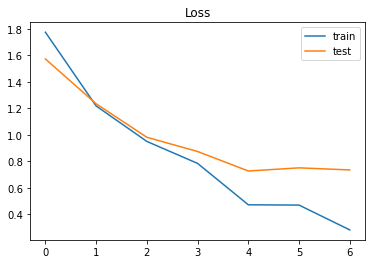

In [26]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

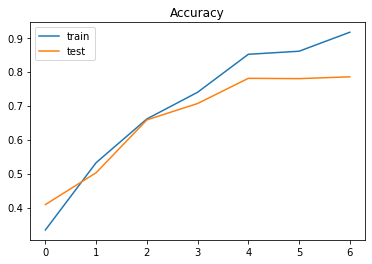

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [28]:
new_complaint = ['i requested loan for my daughter for her education but i didnt get any assistance']
seq = token.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Vehicle loan or lease',                                                 
'Debt collection',                                                                 
'Checking or savings account',                                 
'Money transfer, virtual currency, or money service',                          
'Mortgage',                                                                        
'Payday loan, title loan, or personal loan',                                   
'Credit reporting, credit repair services, or other personal consumer reports',
'Student loan',                                                                    
'Credit card or prepaid card']
print(pred)
print(labels[np.argmax(pred)])

[[1.2952962e-03 6.3359062e-04 4.2232145e-03 4.4673937e-03 7.1429508e-03
  4.8328694e-03 3.0320287e-01 6.6454941e-01 9.6523678e-03]]
Student loan


In [29]:
from keras.layers import Bidirectional

In [30]:
model=Sequential()
model.add(Embedding(92507,EMBEDDING_DIM,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 100)          9250700   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 400, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 9,487,509
Trainable params: 9,487,509
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
epochs=9
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/9
158/158 [==============================] - 930s 6s/step - loss: 1.7957 - accuracy: 0.3228 - val_loss: 1.3925 - val_accuracy: 0.4571
Epoch 2/9
158/158 [==============================] - 952s 6s/step - loss: 1.3223 - accuracy: 0.5034 - val_loss: 1.2058 - val_accuracy: 0.5795
Epoch 3/9
158/158 [==============================] - 4106s 26s/step - loss: 1.0299 - accuracy: 0.6534 - val_loss: 1.2091 - val_accuracy: 0.5964
Epoch 4/9
158/158 [==============================] - 1266s 8s/step - loss: 0.9351 - accuracy: 0.7020 - val_loss: 1.1114 - val_accuracy: 0.6268
Epoch 5/9
158/158 [==============================] - 1286s 8s/step - loss: 0.8886 - accuracy: 0.7014 - val_loss: 0.9816 - val_accuracy: 0.6955
Epoch 6/9
158/158 [==============================] - 1287s 8s/step - loss: 0.7656 - accuracy: 0.7437 - val_loss: 0.9966 - val_accuracy: 0.6973
Epoch 7/9
158/158 [==============================] - 1262s 8s/step - loss: 0.7823 - accuracy: 0.7538 - val_loss: 1.0904 - val_accuracy: 0.6500


In [32]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

88/88 [==============================] - 8s 89ms/step - loss: 1.1397 - accuracy: 0.6336
Test Set Loss 1.139731764793396
Test Set Accuracy 0.633571445941925


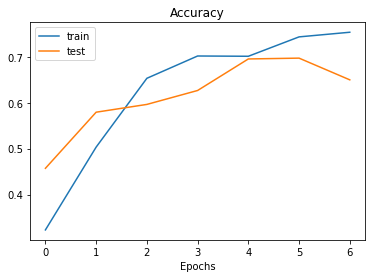

In [33]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show()

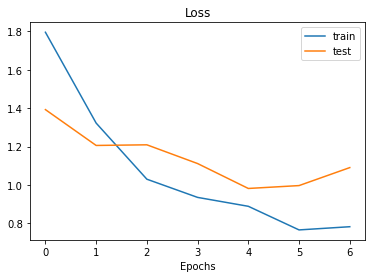

In [34]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [35]:
model=Sequential()
model.add(Embedding(92507,200,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 200)          18501400  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 400, 200)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 18,840,609
Trainable params: 18,840,609
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
epochs=10
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/10
158/158 [==============================] - 3892s 25s/step - loss: 1.6930 - accuracy: 0.3617 - val_loss: 1.4346 - val_accuracy: 0.4563
Epoch 2/10
158/158 [==============================] - 1249s 8s/step - loss: 1.1288 - accuracy: 0.5939 - val_loss: 1.0598 - val_accuracy: 0.6277
Epoch 3/10
158/158 [==============================] - 1330s 8s/step - loss: 0.7511 - accuracy: 0.7484 - val_loss: 0.8789 - val_accuracy: 0.7116
Epoch 4/10
158/158 [==============================] - 1492s 9s/step - loss: 0.5646 - accuracy: 0.8216 - val_loss: 0.7579 - val_accuracy: 0.7580
Epoch 5/10
158/158 [==============================] - 1666s 11s/step - loss: 0.5199 - accuracy: 0.8395 - val_loss: 0.8374 - val_accuracy: 0.7536
Epoch 6/10
158/158 [==============================] - 1775s 11s/step - loss: 0.3009 - accuracy: 0.9077 - val_loss: 0.7547 - val_accuracy: 0.7911
Epoch 7/10
158/158 [==============================] - 7165s 46s/step - loss: 0.2909 - accuracy: 0.9160 - val_loss: 0.7263 - val_accur

In [37]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

88/88 [==============================] - 19s 210ms/step - loss: 0.8285 - accuracy: 0.7904
Test Set Loss 0.8285171985626221
Test Set Accuracy 0.7903571724891663


In [38]:
model=Sequential()
model.add(Embedding(92507,200,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 200)          18501400  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 400, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 128)               168448    
                                                                 
 dense_3 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 18,671,009
Trainable params: 18,671,009
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
epochs=10
batch_size=64
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping
                                                                                                     (monitor='val_loss'
                                                                                                     ,patience=2,min_delta=0.0001)])

Epoch 1/10
158/158 [==============================] - 403s 3s/step - loss: 1.7715 - accuracy: 0.3214 - val_loss: 1.6650 - val_accuracy: 0.3812
Epoch 2/10
158/158 [==============================] - 418s 3s/step - loss: 1.3666 - accuracy: 0.4751 - val_loss: 1.2396 - val_accuracy: 0.5348
Epoch 3/10
158/158 [==============================] - 422s 3s/step - loss: 0.9559 - accuracy: 0.6602 - val_loss: 0.8750 - val_accuracy: 0.7063
Epoch 4/10
158/158 [==============================] - 421s 3s/step - loss: 0.5978 - accuracy: 0.8007 - val_loss: 0.9079 - val_accuracy: 0.6848
Epoch 5/10
158/158 [==============================] - 452s 3s/step - loss: 0.4885 - accuracy: 0.8512 - val_loss: 0.7622 - val_accuracy: 0.7679
Epoch 6/10
158/158 [==============================] - 443s 3s/step - loss: 0.3416 - accuracy: 0.8979 - val_loss: 0.7869 - val_accuracy: 0.7634
Epoch 7/10
158/158 [==============================] - 439s 3s/step - loss: 0.2336 - accuracy: 0.9296 - val_loss: 0.7355 - val_accuracy: 0.7973

In [40]:
accu=model.evaluate(X_test,y_test)
print('Test Set Loss',accu[0])
print('Test Set Accuracy',accu[1])

88/88 [==============================] - 11s 130ms/step - loss: 0.8454 - accuracy: 0.7925
Test Set Loss 0.8454384207725525
Test Set Accuracy 0.7925000190734863
